## Exercise 3.16 Setting the beta hyper-parameters II
(Source: Draper.) Suppose $θ ∼ β(α_1,α_2)$ and we believe that $\mathbb{E}[θ] = m$ and $p(\mathcal{l} < θ < u) = 0.95$. Write a program that can solve for $α_1$ and $α_2$ in terms of $m$, $\mathcal{l}$ and $u$. 

Hint: write $α_2$ as a function of $α_1$ and $m$, so the pdf only has one unknown; then write down the probability mass contained in the interval as an integral, and minimize its squared discrepancy from 0.95. What values do you get if $m = 0.15$, $\mathcal{l} = 0.05$ and $u = 0.3$? 

What is the equivalent sample size of this prior? (NOTE: this is a strange way of phrasing things. I think it means that if we started with an uninformative prior, what sample size would result in this distribution.)

$$
\alpha_2 = \frac{\alpha_1(1-m)}{m}
$$
  

\begin{aligned}
\int_l^u\beta(\theta, \alpha_1,\alpha_2)d\theta & = \int_l^u\frac{\theta^{\,\alpha_1-1}(1-\theta)^{\frac{\alpha_1}{m}-(\alpha_1-1)}}{B(\alpha_1, \frac{1-m}{m}\alpha_1)}d\theta = 0.95
\end{aligned}

We will minimize the squared difference between the probability mass in the interval $[l, u]$ and 0.95 to arrive at the desired result:

i.e. $\min \left(\int_l^up(\theta)d\theta-0.95\right)^2$

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy.special import beta
import seaborn as sns 
sns.set(font_scale=1.2)

In [29]:
def alpha_2(alpha_1, m):
    return alpha_1*(1-m)/m

def _beta(alpha_1, m):
    return beta(alpha_1, alpha_2(alpha_1, m))

def expr(theta, alpha_1, m):
    return theta**(alpha_1-1)*(1-theta)**(alpha_2(alpha_1, m)-1)

def integrand(theta, alpha_1, m):
    return expr(theta, alpha_1, m) / _beta(alpha_1, m)

In [30]:
def func_val(alpha_1, m, l, u):
    integral = (integrate.quad(integrand, l, u, args=(alpha_1, m)))
    final = (integral[0]-0.95)**2
    return final

In [31]:
alpha_1 = 0.3
m = 0.15
l = 0.05
u = 0.3

In [32]:
func_val(alpha_1, m, l, u)

0.40095050917838465

### Visualization

In [33]:
x = np.linspace(1/10000, 10, 10000)
y = np.zeros(x.shape)
for count, alpha in enumerate(x):
    y[count] = func_val(alpha, m, l, u)

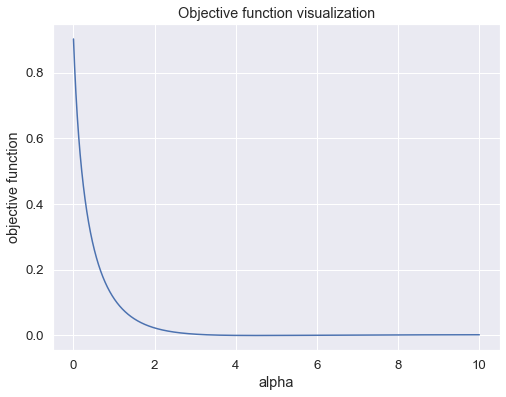

In [34]:
f, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)
ax.set_xlabel('alpha')
ax.set_ylabel('objective function')
ax.set_title('Objective function visualization');

### Optimization
Perform the optimization of our constrained objective function. Constraint is that $\alpha_1 > 0$.

In [23]:
from scipy.optimize import minimize

In [38]:
opt_result = minimize(
    func_val, 
    x0 = 0.25, 
    args=(m, l, u), 
    method='L-BFGS-B', 
    jac=None, 
    bounds=((0, None),), 
    tol=None, 
    callback=None, 
    options={
        'disp': None, 
        'maxls': 20, 
        'iprint': -1, 
        'gtol': 1e-05, 
        'eps': 1e-08, 
        'maxiter': 15000, 
        'ftol': 2.220446049250313e-09, 
        'maxcor': 10, 
        'maxfun': 15000}
)


In [40]:
alpha1_opt = opt_result.x
opt_value = func_val(alpha1_opt, m, l, u)
print(f'Optimum argument: {alpha_opt}, optimum value: {opt_value}')

Optimum argument: [4.50538039], optimum value: 3.202466779073076e-10


### Visualization near optimum

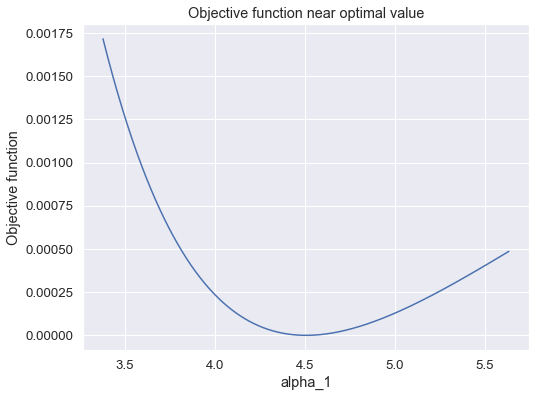

In [45]:
x = np.linspace(opt_result.x * 0.75, opt_result.x * 1.25, 1000)
y = np.zeros(x.shape)
for count, element in enumerate(x):
    y[count] = func_val(element, m, l, u)
    
f, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)
ax.set_xlabel('alpha_1')
ax.set_ylabel('Objective function')
ax.set_title('Objective function near optimal value');

### Calculate parameters

In [47]:
alpha2_opt = alpha_2(alpha1_opt, m)
print(f'Optimal values of alpha_1 = {alpha1_opt}, alpha_2={alpha2_opt}')

Optimal values of alpha_1 = [4.50538039], alpha_2=[25.53048887]


This is approximately equivalent to the Beta prior corresponding to a sample size $N_1=\alpha_1$, $N=N_1+\alpha_2$ which gives $N_1 = 4$, $N = 29$ rounding to integers. 